# Naive Bayes

Naive Bayes é uma técnica de classificação estatística baseada no Teorema de Bayes. É um dos algoritmos de aprendizagem supervisionada mais simples. O classificador Naive Bayes é o algoritmo rápido, preciso e confiável. Os classificadores Naive Bayes têm alta precisão e velocidade em grandes conjuntos de dados.

O classificador Naive Bayes assume que o efeito de um determinado recurso em uma classe é independente de outros recursos. Por exemplo, um solicitante de empréstimo é desejável ou não, dependendo de sua renda, empréstimo anterior e histórico de transações, idade e localização. Mesmo que esses recursos sejam interdependentes, eles ainda são considerados de forma independente. Essa suposição simplifica o cálculo e é por isso que é considerada ingênua. Essa suposição é chamada de independência condicional de classe.

$$P(h|D)=\frac{P(D|h)P(h)}{P(D)}$$

onde:

* P(h): a probabilidade da hipótese h ser verdadeira (independentemente dos dados). Isso é conhecido como a probabilidade anterior de h.

* P(D): a probabilidade dos dados (independentemente da hipótese). Isso é conhecido como probabilidade anterior.

* P(h|D): a probabilidade da hipótese h dados os dados D. Isso é conhecido como probabilidade posterior.

* P(D|h): a probabilidade do dado d dado que a hipótese h fosse verdadeira. Isso é conhecido como probabilidade posterior.

Podendo ser aplicado em casos como:

* Classificação de usuários;
* Detecção de Spam;
* Análise de crédito;

## Tipos de Classificadores de Naive Bayes

### **Gaussiano**: 

Este classificador é usado quando os valores dos preditores são de natureza contínua e presume-se que eles seguem a distribuição Gaussiana.

![fig_1](https://www.researchgate.net/profile/Yune-Lee/publication/255695722/figure/fig1/AS:297967207632900@1448052327024/Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each-data-point.png)

Para cada ponto de dados, é calculada a distância do z-score entre esse ponto e cada média da classe, ou seja, a distância da média da classe dividida pelo desvio padrão dessa classe. Observe que este esquema mostra apenas uma dimensão, enquanto uma distinção crucial entre GNBs e outros classificadores surge apenas quando há mais de uma dimensão de entrada: o GNB não modela a covariância entre as dimensões, mas outros tipos de classificador o fazem.

#### Em Python

0.9466666666666667


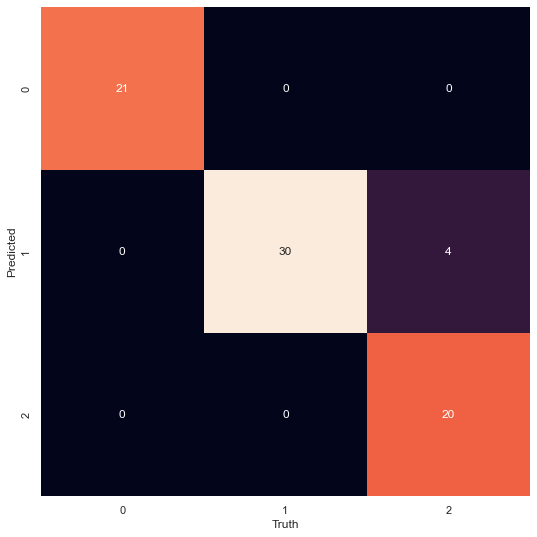

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(gnb.score(X_test, y_test))
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
plt.figure(figsize = (16,9))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [3]:
gnb.score(X_test, y_test)

0.9111111111111111

## Bernoulli:

É usado para dados discretos e funciona na distribuição Bernoulli. A principal característica do Bernoulli Naive Bayes é que ele aceita recursos apenas como valores binários como verdadeiro ou falso, sim ou não, sucesso ou falha, 0 ou 1 e assim por diante. Portanto, quando os valores dos recursos são binários, sabemos que temos que usar o classificador Bernoulli Naive Bayes.

### Em Python

In [4]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score

0.6


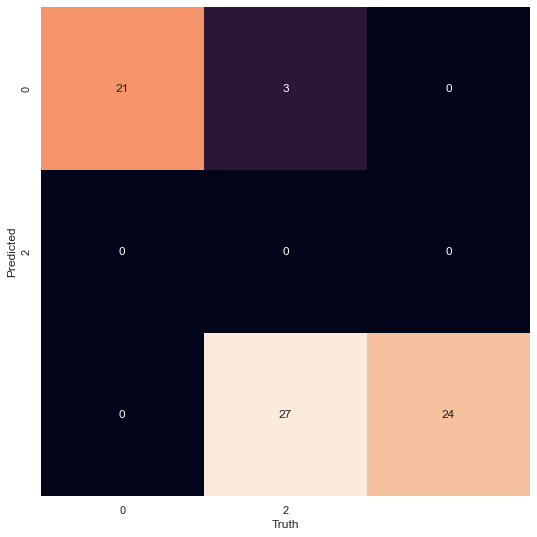

In [21]:
bnb = BernoulliNB(binarize = True)

# Train the model 
bnb.fit(X_train, y_train)

# Predict Output 
y_pred = bnb.predict(X_test)
print(bnb.score(X_test, y_test))
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
plt.figure(figsize = (16,9))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

## Vantagens
* funciona muito rápido e pode prever facilmente a classe de um conjunto de dados de teste.

* pode usá-lo para resolver problemas de previsão de várias classes, pois é bastante útil com eles.

* O classificador Naive Bayes tem um desempenho melhor do que outros modelos com menos dados de treinamento se a suposição de independência de recursos for mantida.

* Se você tiver variáveis de entrada categóricas, o algoritmo Naive Bayes terá um desempenho excepcionalmente bom em comparação com as variáveis numéricas.

## Desvantagens

* Se o seu conjunto de dados de teste tem uma variável categórica de uma categoria que não estava presente no conjunto de dados de treinamento, o modelo Naive Bayes atribuirá probabilidade zero e não será capaz de fazer quaisquer previsões a esse respeito. Este fenômeno é chamado de ‘Zero Frequency’, e você terá que usar uma técnica de suavização para resolver este problema.

* Este algoritmo também é notório como um estimador ruim. Portanto, você não deve levar as saídas de probabilidade de ‘Predict_proba’ muito a sério.

* Ele pressupõe que todos os recursos são independentes. Embora possa parecer ótimo na teoria, na vida real, você dificilmente encontrará um conjunto de recursos independentes.